# Jupyer Data Science Workflow

### From EDA to Reproducible Science


Cole Thorpen
February 28, 2024

University of Washington Information School
IMT 573

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
import os
from urllib.request import urlretrieve

import pandas as pd

URL = 'https://data.seattle.gov/resource/65db-xm6k.csv$limit=50000'

def get_fremont_data(filename='Fremont.csv', url=URL, force_download=False):
    if force_download or not os.path.exists(filename):
        urlretrieve(url, filename)
    data = pd.read_csv('Fremont.csv', index_col='date', parse_dates=True)
    data.columns = ['Total', 'Northbound', 'Southbound']
    return data

In [3]:
data = get_fremont_data()
data.head()

,Total,Northbound,Southbound
date,,,
2023-12-31 23:00:00,45,15,30
2023-12-31 22:00:00,22,12,10
2023-12-31 21:00:00,20,9,11
2023-12-31 20:00:00,27,14,13
2023-12-31 19:00:00,33,14,19


<AxesSubplot:xlabel='date'>

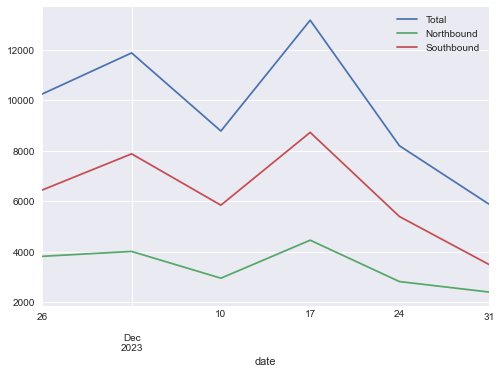

In [4]:
data.resample('W').sum().plot()

<AxesSubplot:xlabel='time'>

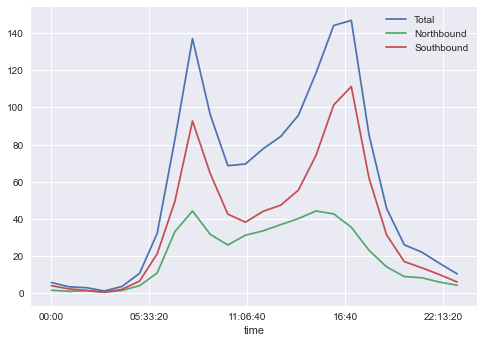

In [5]:
data.groupby(data.index.time).mean().plot()

<AxesSubplot:xlabel='time'>

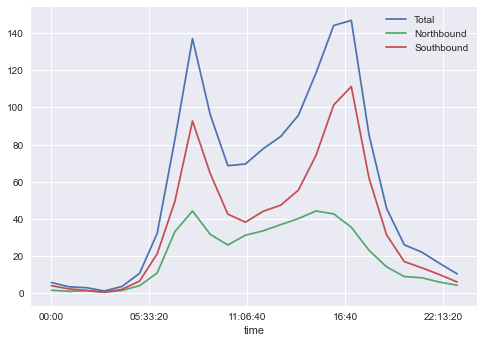

In [6]:
data.groupby(data.index.time).mean().plot()

In [7]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2023-11-20,2023-11-21,2023-11-22,2023-11-23,2023-11-24
00:00:00,NaN,4.0,4.0,6.0,1.0
01:00:00,NaN,4.0,2.0,3.0,2.0
02:00:00,NaN,3.0,2.0,3.0,2.0
03:00:00,NaN,1.0,0.0,2.0,1.0
04:00:00,NaN,10.0,3.0,0.0,3.0


<AxesSubplot:xlabel='time'>

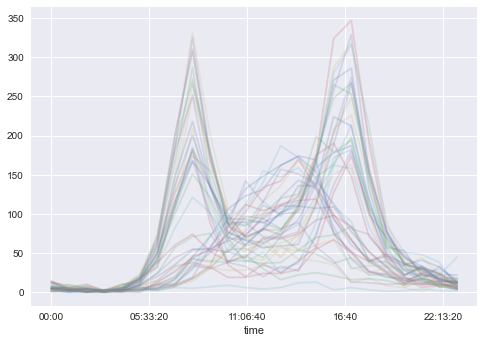

In [8]:
pivoted.plot(legend=False, alpha=0.2)